# Minimal Prompt with GPT-4

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Step 2: Import libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt


In [ ]:
# Step 3: Define dataset paths
base_dir = '/content/drive/MyDrive/Dissertation/FinalDataset'

train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')


In [ ]:
# Step 4: Data generators (assumes grayscale 128x128 images)
batch_size = 32
img_height = 128
img_width = 128

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False
)


Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
# Step 5: Build CNN model
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 1)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train the model
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1185s 16s/step - accuracy: 0.5390 - loss: 0.6978 - val_accuracy: 0.6133 - val_loss: 0.6364
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.6971 - loss: 0.6004 - val_accuracy: 0.7633 - val_loss: 0.5370
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.7750 - loss: 0.5036 - val_accuracy: 0.7033 - val_loss: 0.6107
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.7509 - loss: 0.5178 - val_accuracy: 0.7800 - val_loss: 0.4700
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.8042 - loss: 0.4494 - val_accuracy: 0.7900 - val_loss: 0.4463
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.8411 - loss: 0.3717 - val_accuracy: 0.8267 - val_loss: 0.3963
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.8450 - loss: 0.3499 - val_accuracy: 0.8200 - val_loss: 0.3989
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.9009 - loss: 0.2634 - val_accurac

# Analysis - Manual

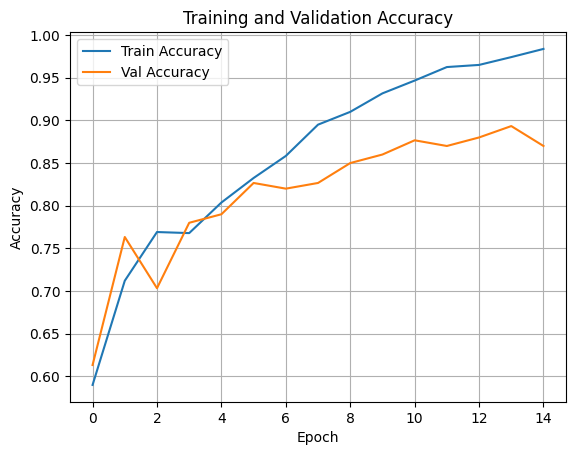

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
test_loss, test_acc = model.evaluate(test_generator)

print(f'Validation Accuracy: {val_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8709 - loss: 0.2494
10/10 ━━━━━━━━━━━━━━━━━━━━ 186s 21s/step - accuracy: 0.8972 - loss: 0.2660
Validation Accuracy: 0.8600
Test Accuracy: 0.8967


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
              precision    recall  f1-score   support

      Impact       0.92      0.87      0.89       150
    Volcanic       0.87      0.93      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



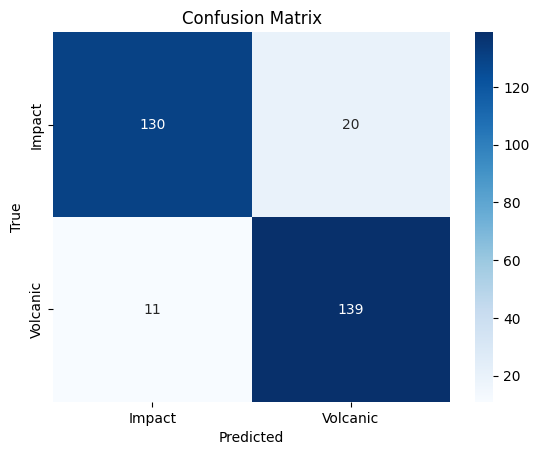

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_probs = model.predict(test_generator).ravel()
y_pred = (y_probs > 0.5).astype(int)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=['Impact', 'Volcanic']))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Impact', 'Volcanic'], yticklabels=['Impact', 'Volcanic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save

In [ ]:
# Create folder if it doesn't exist
import os
save_dir = "/content/drive/MyDrive/Dissertation/Models"
os.makedirs(save_dir, exist_ok=True)

# Save model
model.save(os.path.join(save_dir, "EXP_001.h5"))
print(f"Model saved to {os.path.join(save_dir, 'EXP_001.h5')}")

import pickle

# Save history object
with open(os.path.join(save_dir, "EXP_001_history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

print(f"History saved to {os.path.join(save_dir, 'EXP_001_history.pkl')}")

Model saved to /content/drive/MyDrive/Dissertation/Models/EXP_001.h5
History saved to /content/drive/MyDrive/Dissertation/Models/EXP_001_history.pkl
